In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaoke/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
df = pd.read_csv("testdata.manual.2009.06.14.csv",encoding='ISO-8859-1',header=None)
print("size of training data:",df.shape)
df=df.rename(columns={0:"sentiment",1:"id",2:"time",3:"device",4:"user",5:"tweets"})
df.head()

size of training data: (498, 6)


,sentiment,id,time,device,user,tweets
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [41]:
sentiment = df['sentiment'].values
neutral_rate = (df[df['sentiment']==0].count().values[2])/len(sentiment)

In [42]:
neutral_rate

0.35542168674698793

In [43]:
import numpy as np
sentiment = df['sentiment'].values
sentiment
tweets = df['tweets'].values
Neu_rate = (df[df['sentiment']==2].count().values[0])/len(sentiment)
Pos_rate = (df[df['sentiment']==4].count().values[0])/len(sentiment)
Neg_rate = (df[df['sentiment']==0].count().values[0])/len(sentiment)

print('the percentage of positive tweets', Pos_rate)
print('the percentage of negative tweets', Neg_rate)
print('the percentage of neutral tweets', Neu_rate)

the percentage of positive tweets 0.3654618473895582
the percentage of negative tweets 0.35542168674698793
the percentage of neutral tweets 0.2791164658634538


In [44]:
tweets[1]

'Reading my kindle2...  Love it... Lee childs is good read.'

In [45]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer

In [46]:
index = df.index[df['sentiment'] == 4].tolist()
tweets_pos = (df.loc[index])['tweets'].values

#print(tweets_good[3])
pos_words = []
tokenizer = RegexpTokenizer('\S+')
for words in tweets_pos:
    pos_words.append(tokenizer.tokenize(words))

In [47]:
hashtags_pos = []
for words in pos_words:
    for word in words:
        if word[0] == '#':
            hashtags_pos.append(word)
freqG = nltk.FreqDist(hashtags_pos)

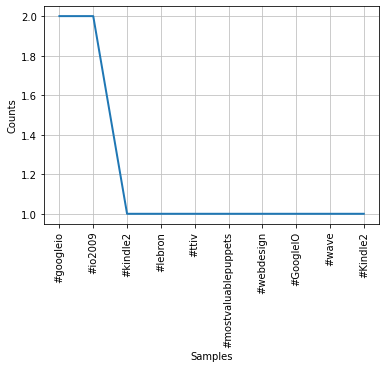

In [48]:
freqG.plot(20) 

In [49]:
index = df.index[df['sentiment'] == 0].tolist()
tweets_neg = (df.loc[index])['tweets'].values

#print(tweets_good[3])
neg_words = []
tokenizer = RegexpTokenizer('\S+')
for words in tweets_neg:
    neg_words.append(tokenizer.tokenize(words))
    
hashtags_neg = []
for words in neg_words:
    for word in words:
        if word[0] == '#':
            hashtags_neg.append(word)
freqG = nltk.FreqDist(hashtags_neg)

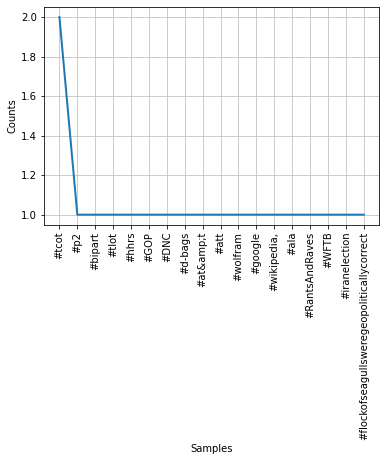

In [50]:
freqG.plot(20) 

In [51]:
print(sentiment.shape)

(498,)


In [52]:
y = df['sentiment'].values
X= df['tweets'].values
print(X[:6,])
len(X)

['@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.'
 'Reading my kindle2...  Love it... Lee childs is good read.'
 'Ok, first assesment of the #kindle2 ...it fucking rocks!!!'
 "@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :)"
 "@mikefish  Fair enough. But i have the Kindle2 and I think it's perfect  :)"
 "@richardebaker no. it is too big. I'm quite happy with the Kindle2."]


498

In [53]:
tokenizer = RegexpTokenizer('\S+')
X_rm_usr = []
for tweet in X:
    words = tokenizer.tokenize(tweet)
    sentence = ' '.join(c for c in list(words) if c[0] != '@')
    X_rm_usr.append(sentence)
X_rm_usr[:6]

['I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.',
 'Reading my kindle2... Love it... Lee childs is good read.',
 'Ok, first assesment of the #kindle2 ...it fucking rocks!!!',
 "You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :)",
 "Fair enough. But i have the Kindle2 and I think it's perfect :)",
 "no. it is too big. I'm quite happy with the Kindle2."]

In [54]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
corpus_words = set(nltk.corpus.words.words())
stop_words=set(stopwords.words("english"))
def stopwords_remove(words):
    filter_words = [word for word in words if word not in stop_words]
    if not filter_words:       # Use full list if necessary
        filter_words = words
    return filter_words


In [55]:
tokenizer = RegexpTokenizer('\w+')
#remove non words
rm_non_words = []
for w in X_rm_usr:
    #w_rm = [w.lower() for w in tokenizer.tokenize(w) if w in corpus_words or not w.isalpha()]
    x_wo_num = ''.join(c for c in w if not c.isdigit()) # remove numbers
    w_clean = [w.lower() for w in tokenizer.tokenize(x_wo_num) if w in corpus_words or not w.isalpha()]
    rm_non_words.append(w_clean)
                       

X_processed = []
stemmer = PorterStemmer()
## stem the words
for text in rm_non_words:
    removing_stopwords = stopwords_remove(text)
    stemmed=[stemmer.stem(w) for w in removing_stopwords]
    X_processed.append(stemmed)



In [56]:
X_processed = []
stemmer = PorterStemmer()
## stem the words
for text in rm_non_words:
    stemmed=[stemmer.stem(w) for w in text]
    removing_stopwords = stopwords_remove(stemmed)   
    X_processed.append(removing_stopwords)

In [57]:
X_processed[:6]

[['cool', 'fantast', 'right'],
 ['kindl', 'lee', 'good', 'read'],
 ['ok', 'first', 'kindl'],
 ['love',
  'mine',
  'never',
  'back',
  'new',
  'big',
  'one',
  'huge',
  'need',
  'remors'],
 ['enough', 'think', 'perfect'],
 ['big', 'quit', 'happi']]